# Redes Neurais Artificiais - Aula 22


## Introdução Intuitiva

Estrutura de um neurônio:

![neuronio](../images/neuronio.jpg)

Inspirado nos neurônios e no funcionamento do sistema nervoso, foi criado o **perceptron**:

![perceptron](../images/perceptron.png)

### Perceptron

In [7]:
import numpy as np


np.sign(0)

0

w = [0, 0, 0]

a, b, c, isFraude
1, 2, 3, 1
1, 3, 2, -1
0, 1, 1, -1
5, 2, 2, -1

r = [1, 2, 3] * [[0], [0], [0]] = 0 + 0 + 0 = 0

sign(r) == sign(isFraude) => False


w = w +- [a, b, c] -> w = w + [1, 2, 3] = [1, 2, 3]


w = [1, 2, 3]

r = [1, 3, 2] * wT = [1, 3, 2] * [[1], [2], [3]] = 1 + 6 + 6 = 13

sign(r) == sign(isFraude) = + == - => False

w = w - [1, 3, 2] = [1, 2, 3] - [1, 3, 2] = [0, -1, 1]

w = [0, -1, 1]



[0, 1, 1] * [0, -1, 1] = 0 + (-1) + 1 = 0 

sign(0) != sign(-1) => w = w - [0, 1, 1]

w = [0, -2, 0]


[5, 2, 2] * [0, -2, 0] = 0 + -2 + 0 = -2


sign(-2) == sign(-1) TRUE



w = [0, -2, 0]



[1, 2, 3] * wT = 0 + -4 + 0 = -4





Em machine learning, redes neurais são *redes de perceptrons*:

![rn](../images/rn.png)

erro detectado\
se label for positiva e o julgamento foi negativo:\
    w = w + learning_rate * X\
se label for negativa e o julgamento foi positivo:\
    w = w - learning_rate * X
    
    
    erro = 0
    
[0, 5, 2, 3] -> -1

[-5, 2, 12, 3] -> +1

[0, 0, 0, 0] * [0, 5, 2, 3]^T = 0 -> sign(0) -> + != sign(-1)

w = [0, 0, 0, 0] - 1*[0, 5, 2, 3] = [-0, -5, -2, -3]

w*XT = [-0, -5, -2, -3] * [-5, 2, 12, 3]T = 0-10-24-9 = -43 -> sign(-43) != sign(+1)

w = w + X = [-5, +3, +10, 0]


#### Exemplo 2
[1, 2] -> 1

[2, 1] -> -1

w[0] = w[0] + -1 * 1 *x[0]


w = [0, 0]

w*X1T = 0 -> sign(0) == sign(1) -> nao ajusto a reta

w*x2T = 0 -> sign(0) != sign(-1) -> ajusto a resta
w = w - X -> w = [-2, -1]

w = [-2, -1]

w * x1T = -4 -> sign(-4) != sign(+1) -> ajusto a reta

w = [-1, +1]

w*x2T = -1 -> sign(-1) = sign(-1)

w*x1T = 1


[1, 2]

[1, 4]

Sugestão para leitura:

[Handwritten Digit Recognition using Machine Learning](https://medium.com/@himanshubeniwal/handwritten-digit-recognition-using-machine-learning-ad30562a9b64)

[Neural Networks Explained](https://medium.com/datadriveninvestor/neural-networks-explained-6e21c70d7818)

[Activation Functions in Neural Networks](https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6)

[Redes Neurais, Perceptron Multicamadas e o Algoritmo Backpropagation](https://medium.com/ensina-ai/redes-neurais-perceptron-multicamadas-e-o-algoritmo-backpropagation-eaf89778f5b8)

[What the Hell is Perceptron?](https://towardsdatascience.com/what-the-hell-is-perceptron-626217814f53)

[Learning from data](https://work.caltech.edu/lectures.html#lectures)

[Fundamentals of Deep Learning – Activation Functions and When to Use Them?](https://www.analyticsvidhya.com/blog/2020/01/fundamentals-deep-learning-activation-functions-when-to-use-them/#:~:text=The%20main%20advantage%20of%20using,neurons%20at%20the%20same%20time.&text=Due%20to%20this%20reason%2C%20during,neurons%20which%20never%20get%20activated.)

[Why Rectified Linear Unit (ReLU) in Deep Learning and the best practice to use it with TensorFlow](https://towardsdatascience.com/why-rectified-linear-unit-relu-in-deep-learning-and-the-best-practice-to-use-it-with-tensorflow-e9880933b7ef)

## Aplicação Prática

### Importação de Bibliotecas e Funções

In [8]:
# pip install keras

In [9]:
# !pip install tensorflow

In [10]:
# Uso geral
import numpy as np
import pandas as pd

# Criação de gráficos/imagens
from matplotlib import pyplot as plt
%matplotlib inline

# Necessário para ler a base
import os
import gzip

# Importação de funções úteis do Keras
# Aqui são importadas apenas as funções específicas e não a biblioteca inteira por questões de legibilidade do código
import tensorflow as tf
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import RMSprop, Adam

# # Algumas coisas úteis para pré-processamento ou avaliação de modelos
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

### Leitura do MNIST

Para classificação usando rede neural, vamos usar a base do MNIST. 

Essa base é composta por imagens de números manuscritos, tendo como objetivo (target, y) identificar o número. Cada imagem é uma matriz 28 x 28, contendo assim 784 pixels. As imagens estão em escala de cinza, na qual cada pixel pode variar de 0 a 255, e foram centralizadas, de forma que o número não fique "cortado" por estar na borda. Além disso, a base está dividida em 60 mil casos para treino e 10 mil casos para teste.

Na função ``carrega_mnist()`` são passados dois parâmetros:
- ``caminho``: o caminho (relativo ou completo) de onde estão os arquivos da base;
- ``tipo``: se os arquivos a serem carregados são de treino (train) ou de teste (t10k), sendo por padrão treino.

Essa função então lê a base e retorna dois numpy arrays (a = 60000 ou a = 10000, a depender do tipo): 
- o primeiro da forma (a, 784), que são os 784 pixels da imagem organizados de forma sequencial;
- o segundo da forma (a, 1), que é o identificador (label) da imagem, sendo um número que varia de 0 a 9.

Para maiores detalhes, verificar a [página da base](http://yann.lecun.com/exdb/mnist/).

In [11]:
def carrega_mnist(caminho, tipo = 'train'):
    label_caminho = os.path.join(caminho, '%s-labels-idx1-ubyte.gz' % tipo)
    imagens_caminho = os.path.join(caminho, '%s-images-idx3-ubyte.gz' % tipo)
    with gzip.open(label_caminho, 'rb') as lbpath:
        lbpath.read(8)
        buffer = lbpath.read()
        labels = np.frombuffer(buffer, dtype=np.uint8)

    with gzip.open(imagens_caminho, 'rb') as imgpath:
        imgpath.read(16)
        buffer = imgpath.read()
        imagens = np.frombuffer(buffer, 
                               dtype=np.uint8).reshape(
            len(labels), 784).astype(np.float64)
 
    return imagens, labels

x_treino, y_treino = carrega_mnist("./../datasets/")
x_teste, y_teste = carrega_mnist("../datasets/", "t10k")

In [12]:
x_treino.shape, y_treino.shape

((60000, 784), (60000,))

In [13]:
x_teste.shape, y_teste.shape

((10000, 784), (10000,))

In [14]:
x_treino[0].shape

(784,)

In [15]:
x_treino.shape

(60000, 784)

In [16]:
x_treino[0].reshape(28, 28)

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

In [17]:
x_treino[0].reshape(28, 28)

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

3


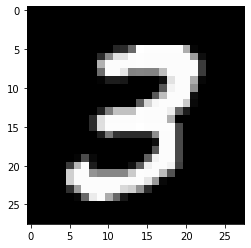

In [18]:
n = 7
plt.imshow(x_treino[n].reshape(28, -1), cmap='gray')
print(y_treino[n])

In [19]:
np.unique(y_treino)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

### Pré-processamento

#### Rescalamento

É interessante que o os valores sejam rescalados entre 0 e 1 para que o tempo de treinamento seja otimizado. Algumas respostas sobre o porquê disso podem ser vistas nesse [link](https://stackoverflow.com/questions/4674623/why-do-we-have-to-normalize-the-input-for-an-artificial-neural-network). Então, fazemos a divisão correpondentes aos pixels das imagens pelo pixel de valor máximo do conjunto de treino, evitando data leak (nesse caso isso não ocorreria, mas de qualquer forma é uma boa prática).

In [20]:
np.max(x_treino), np.min(x_treino)

(255.0, 0.0)

In [21]:
m = np.max(x_treino)
x_treino = x_treino/m
x_teste = x_teste/m

np.max(x_treino), np.min(x_treino)
np.max(x_teste), np.min(x_teste)

(1.0, 0.0)

#### One Hot Encoder

Para classificação em rede neural, na última camada cada neurônio deve corresponder a uma classe do problema. Dessa forma, é necessário mapear o target com One Hot Encoder. Esse tipo de mapeamento é um vetor com a mesma quantidade de classes existentes, com cada posição desse vetor correspondendo a uma classe. 

Fica mais fácil entender observando o exemplo. Selecionando os 5 primeiros exemplos antes de maperar com One Hot Encoder, temos os targets 5, 0, 4, 1, 9. Após o One Hot Encoder, temos uma matriz esparsa que:
- o valor 1 na primeira linha está na coluna 6, que corresponde ao target 5
- o valor 1 na segunda linha está na coluna 1, que corresponde ao target 0
- o valor 1 na terceira linha está na coluna 5, que corresponde ao target 4
- o valor 1 na quarta linha está na coluna 2, que corresponde ao target 1
- o valor 1 na quinta linha está na coluna 10, que corresponde ao target 9

In [22]:
y_treino[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [23]:
y_treino.reshape(-1, 1)

array([[5],
       [0],
       [4],
       ...,
       [5],
       [6],
       [8]], dtype=uint8)

In [24]:
hot = OneHotEncoder()
y_treino = hot.fit_transform(y_treino.reshape(-1, 1)).toarray()
# y_val = hot.fit_transform(y_val.reshape(-1, 1)).toarray()
y_teste = hot.fit_transform(y_teste.reshape(-1, 1)).toarray()

y_treino[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [25]:
y_treino

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

### Conjunto de Validação

Em rede neural, é importante que exista um terceiro conjunto além de treino e teste, que é o conjunto de validação.

Durante o treinamento, a depender do caso, o risco de ocorrer overfitting é bastante alto. Uma forma de verificar e evitar isso é por meio do conjunto de validação, o qual é um subconjunto do conjunto de treino que não é utilizado pelo otimizador.  Espera-se que a o valor da função de perda (loss) vá diminuindo a cada época, tanto para o conjunto de treino como para o conjunto de validação. Porém, se a função de perda diminui para o conjunto de treino e aumenta para o conjunto de validação (ocorrendo assim um descolamento), podemos concluir que está ocorrendo um overfitting para o conjunto de treino. Deve-se então interromper o processo de treinamento. Esse comportamento pode ser visto com mais facilidade nos próximos tópicos.

Para fazer a divisão, usamos a função ``train_test_split`` do ``sklearn`` e definimos que o conjunto de validação será 10% do conjunto de treino.

In [26]:
from sklearn.model_selection import train_test_split

x_treino, x_val, y_treino, y_val = train_test_split(x_treino, y_treino, test_size = 0.1, random_state = 13)

x_treino.shape, x_val.shape, x_teste.shape, y_treino.shape, y_val.shape, y_teste.shape, 

((54000, 784), (6000, 784), (10000, 784), (54000, 10), (6000, 10), (10000, 10))

### Arquitetura da Rede

Definindo parâmetros da rede.

Faremos uma rede simples, com 3 camadas de 25 neurônios cada e ativação ReLu nas camadas escondidas e uma camada de 10 neurônios e ativação Softmax na camda de saída. Utilizaremos, por hora, o modelo sequencial do Keras.

Primeiro definimos que nossa rede é do tipo sequencial, utilizando a função ``Sequential()``. Dessa forma, utilizamos o método ``.add()`` para adicionar as camadas, uma após a outra, de forma que a saída da última será a entrada da próxima. 

A primeira camada adicionada é uma camada densa (fully connected) com 25 neurônios. Para isso, é usada a função ``Dense()``, que conecta todos os valores de input e todos o neurônios da camada. Na primeira camada, é necessário definir a dimensão dos dados de entrada. Em camadas subsequentes isso não será necessário, já que o Keras subentenderá que a dimensão de entrada será a dimensão da última saída. No caso da rede em questão, os 784 pixels da imagem estarão todos conectados, um a um, aos 25 neurônios da primeira camada, produzindo 25 saídas nessa camada.

Após a camada densa, é necessário inserir a camada de ativação, por meio da função ``Activation()``. Ao usar essa função, é necessário definir qual função de fato será usada passando uma string como parâmetro pra função. Dentre as disponíveis no Keras estão ``'tanh'``, ``'sigmoid'``, ``'softmax'`` e ``'relu'``. Nessa camada, a ReLu será usada.

Foi por meio dela (e uma outra série de fatores) que as redes neurais voltaram a amplamente utilizadas nos últimos anos, porém por simplesmente ignorar valores negativos, independentemente da sua magnitude, apresenta problemas para alguns casos no treinamento. Esse problema é resolvido pela Leaky ReLu, que é levemente inclinada em sua parte negativa, passando a levar em consideração a magnitude de outputs negativos sem deixar que a ativação seja linear.

Esse processo de ``Dense()`` e ``Activation()`` é repetido mais duas vezes com os mesmos parâmetros. 

Posteriormente, por ser um problema de classificação com 10 classes diferentes, é importante que a saída possua 10 neurônios. Dessa forma, cada neurônio representará uma classe, sendo a predição a classe pertencente ao neurônio com maior valor de saída. Outro fator importante é o uso de uma camada de ativação Softmax após essa última camada com 10 neurônios. A ativação Softmax funciona como uma versão mais generalizada da função sigmóide (ou logística), usada principalmente para predições multiclasses, já que a soma das saídas resultará no valor 1, com nenhum valor sendo negativo. Ou seja, com valores entre 0 e 1, a saída de cada neurônio pode ser interpretada como a probabilidade daquela instância pertencer àquela classe.

In [27]:
rede_simples = Sequential()

rede_simples.add(Dense(25,  input_dim = 784))
rede_simples.add(Activation('relu'))
rede_simples.add(Dense(25))
rede_simples.add(Activation('relu'))
rede_simples.add(Dense(25))
rede_simples.add(Activation('relu'))
rede_simples.add(Dense(10))
rede_simples.add(Activation('softmax'))

A rede então deve ser compilada usando o método ``compile()``. Devem ser passados a [função de perda](https://keras.io/losses/) e o [otimizador](https://keras.io/optimizers/) a serem utilizados. Para a função de perda, usamos ``categorial_crossentropy`` por ser um problema de classificação não binário. Já o otimizador escolhido foi o ``RMSprop()``.

Diferentes funções de perda possuem diferentes propósitos, devendo ser escolhido caso a caso. Já os otimizadores possuem maior liberdade de escolha, não existindo uma regra fechada.

A arquitetura da rede pode ser visualizada com o método ``.summary()``.

In [28]:
rede_simples.compile(loss = 'categorical_crossentropy', optimizer = RMSprop(lr = 0.00015))

pesos_iniciais = rede_simples.get_weights()

rede_simples.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 25)                19625     
_________________________________________________________________
activation (Activation)      (None, 25)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 25)                650       
_________________________________________________________________
activation_1 (Activation)    (None, 25)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 25)                650       
_________________________________________________________________
activation_2 (Activation)    (None, 25)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2

In [29]:
25*25 + 25

650

In [33]:
pesos_iniciais[0]

array([[-0.07732452, -0.0766573 , -0.03694231, ..., -0.07251485,
         0.00130053,  0.08095776],
       [ 0.039564  ,  0.03088531, -0.05163733, ..., -0.07179698,
        -0.00252601,  0.08005744],
       [ 0.06905951, -0.06991787,  0.01653885, ..., -0.03331537,
         0.03373864, -0.08183432],
       ...,
       [-0.02698947,  0.00124256, -0.04197264, ..., -0.03762561,
         0.06716904,  0.00222199],
       [ 0.08392367, -0.02716236, -0.04567062, ...,  0.07810178,
         0.06308115,  0.06644866],
       [ 0.02459182, -0.02205556,  0.05987146, ...,  0.02302985,
        -0.07495447,  0.03512666]], dtype=float32)

In [34]:
rede_simples.set_weights(pesos_iniciais)

### Treinamento

Agora vem a parte de treinamento da rede neural. Para isso, basta usar o método ``.fit()`` e definir a quantidade de épocas, conjunto de treino e conjunto de validação. O parâmetro ``verbose`` define se informações de treinamento devem ser exibidas na tela a cada época.

In [27]:
historico = rede_simples.fit(x_treino, 
                             y_treino, 
                             epochs = 20, 
                             verbose = 1,
                             validation_data = (x_val, y_val))

Epoch 1/20
1688/1688 [==============================] - 1s 604us/step - loss: 0.9180 - val_loss: 0.4196
Epoch 2/20
1688/1688 [==============================] - 1s 490us/step - loss: 0.3485 - val_loss: 0.3162
Epoch 3/20
1688/1688 [==============================] - 1s 476us/step - loss: 0.2817 - val_loss: 0.2692
Epoch 4/20
1688/1688 [==============================] - 1s 479us/step - loss: 0.2450 - val_loss: 0.2401
Epoch 5/20
1688/1688 [==============================] - 1s 488us/step - loss: 0.2203 - val_loss: 0.2196
Epoch 6/20
1688/1688 [==============================] - 1s 476us/step - loss: 0.2029 - val_loss: 0.2085
Epoch 7/20
1688/1688 [==============================] - 1s 479us/step - loss: 0.1888 - val_loss: 0.1944
Epoch 8/20
1688/1688 [==============================] - 1s 481us/step - loss: 0.1770 - val_loss: 0.1849
Epoch 9/20
1688/1688 [==============================] - 1s 482us/step - loss: 0.1669 - val_loss: 0.1814
Epoch 10/20
1688/1688 [==============================] - 1s 479u

In [31]:
def plot_model_loss(history):
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    plt.ylabel('val_loss');plt.xlabel=('epoch')
    plt.semilogy(history.history['val_loss'])
#     plt.show()
    plt.subplot(1, 2, 2)

    plt.semilogy(history.history['loss'])

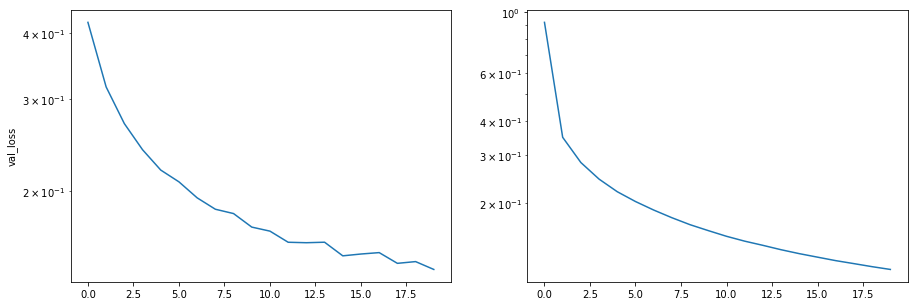

In [32]:
plot_model_loss(historico)

Calculando a acurácia e mostrando a matriz confusão, temos:

In [33]:
pred_simples = rede_simples.predict(x_teste)

accuracy_score(y_teste.argmax(1), pred_simples.argmax(1))

0.9597

In [34]:
confusion_matrix(y_teste.argmax(1), pred_simples.argmax(1))

array([[ 966,    0,    1,    2,    1,    2,    4,    1,    2,    1],
       [   0, 1117,    6,    1,    0,    1,    3,    0,    7,    0],
       [   6,    3,  992,    3,    2,    2,    7,    7,    9,    1],
       [   0,    0,   10,  961,    0,   14,    0,    8,   11,    6],
       [   2,    1,    6,    0,  938,    2,   10,    2,    4,   17],
       [  11,    1,    1,   13,    2,  842,    9,    2,    8,    3],
       [   9,    3,    2,    1,    5,    4,  930,    0,    4,    0],
       [   2,    6,   20,    9,    1,    0,    0,  978,    0,   12],
       [   4,    4,    3,    5,    4,    7,    8,    7,  929,    3],
       [   4,    7,    1,   10,   16,   13,    1,    7,    6,  944]],
      dtype=int64)

O modelo está então treinado, pronto para uso. Mas algumas coisas devem ser observadas a partir desse resutaldo.

#### Overfitting

O overfitting é algo que pode ser bastante comum em redes neurais se não for bem tratado. A seguir, são descritas algumas técnicas que ajudam e minimizar a interferência do overfitting em um modelo.

##### Early Stopping

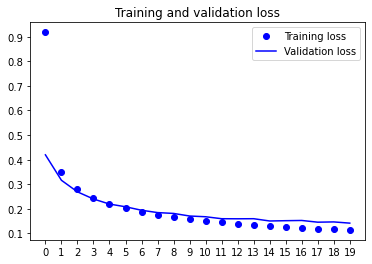

In [36]:
loss = historico.history['loss']
val_loss = historico.history['val_loss']
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.xticks(epochs)
plt.title('Training and validation loss')
plt.legend()
plt.show()

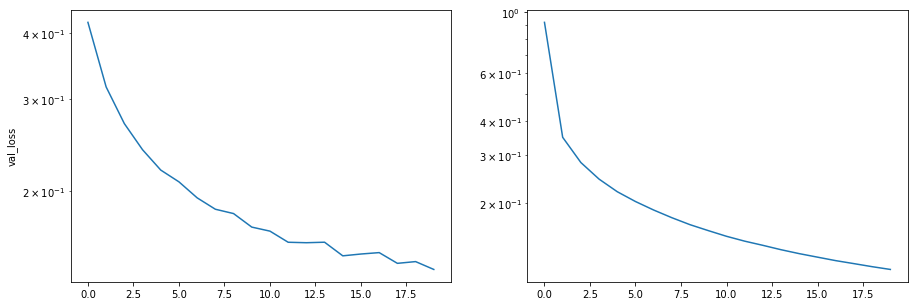

In [37]:
plot_model_loss(historico)

Pelo gráfico, é possível perceber que mais ou menos a partir da 15ª época a função de perda continuou decrescedo pro conjunto de treinamento, entretanto no conjunto de validação isso se manteve fixo por um tempo e depois começou a perder desempenho. Isso é um forte indício que está começando a ocorrer overfitting, ou seja, é interessante que o treinamento seja interrompido.

Para interromper um treinamento, podemos usar o callback de ``EarlyStopping()``. Esse callback pode receber alguns parâmetros, como o que ele deve monitorar (``monitor``), a diferença mínima que deve ser considerada pra ser um avanço (``min_delta``) e a quantidade de épocas que devem se manter sem avanço até de fato interromper o treinamento (``patience``). No exemplo a seguir, estamos monitorando a função de perda do conjunto de validação, consideramos um avanço mínimo o valor de 0.001 e paciência de 3 épocas. Ou seja, se a função de perda na validação não tiver uma redução de pelo menos 0.001 por 3 épocas, o treinamento será interrompido.

In [38]:
es = EarlyStopping(monitor = 'val_loss', min_delta = 0.001, patience = 3, verbose = 1, mode = 'auto')

# Setamos os pesos iniciais iguais à versão antes do treinamento pra ter um comparativo mais real.
rede_simples.set_weights(pesos_iniciais)

historico = rede_simples.fit(x_treino, 
                             y_treino, 
                             epochs = 150, 
                             verbose = 1,
                             validation_data = (x_val, y_val),
                             callbacks = [es])

Epoch 1/150
1688/1688 [==============================] - 1s 524us/step - loss: 0.9425 - val_loss: 0.4228
Epoch 2/150
1688/1688 [==============================] - 1s 513us/step - loss: 0.3529 - val_loss: 0.3201
Epoch 3/150
1688/1688 [==============================] - 1s 503us/step - loss: 0.2876 - val_loss: 0.2770
Epoch 4/150
1688/1688 [==============================] - 1s 500us/step - loss: 0.2511 - val_loss: 0.2510
Epoch 5/150
1688/1688 [==============================] - 1s 502us/step - loss: 0.2260 - val_loss: 0.2317
Epoch 6/150
1688/1688 [==============================] - 1s 495us/step - loss: 0.2070 - val_loss: 0.2111
Epoch 7/150
1688/1688 [==============================] - 1s 512us/step - loss: 0.1916 - val_loss: 0.1993
Epoch 8/150
1688/1688 [==============================] - 1s 506us/step - loss: 0.1793 - val_loss: 0.1939
Epoch 9/150
1688/1688 [==============================] - 1s 490us/step - loss: 0.1693 - val_loss: 0.1804
Epoch 10/150
1688/1688 [==============================]

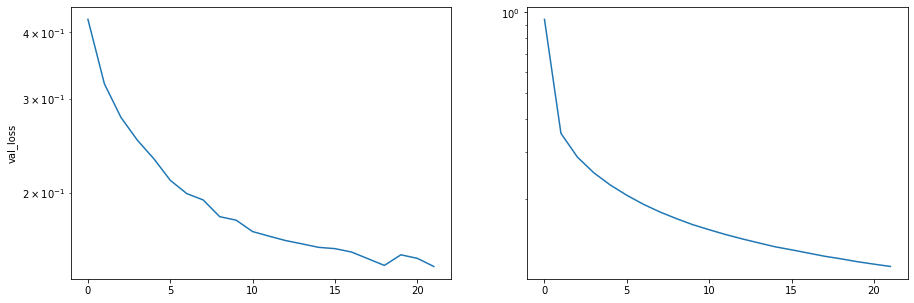

In [39]:
plot_model_loss(historico)

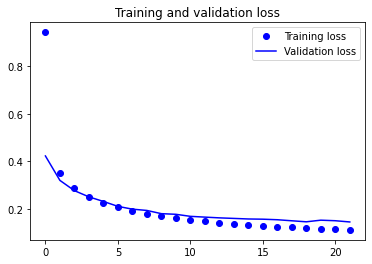

In [40]:
loss = historico.history['loss']
val_loss = historico.history['val_loss']
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [41]:
pred_es = rede_simples.predict(x_teste)

accuracy_score(y_teste.argmax(1), pred_es.argmax(1))

0.9612

In [42]:
confusion_matrix(y_teste.argmax(1), pred_es.argmax(1))

array([[ 970,    0,    1,    1,    1,    2,    3,    1,    0,    1],
       [   0, 1117,    6,    1,    1,    1,    2,    1,    6,    0],
       [   3,    2,  994,    7,    2,    2,    9,    8,    5,    0],
       [   1,    0,   14,  961,    0,   16,    0,    8,    7,    3],
       [   1,    0,    6,    0,  942,    4,    8,    3,    2,   16],
       [   8,    1,    2,   14,    3,  847,    6,    3,    4,    4],
       [  10,    3,    5,    1,    6,    6,  924,    0,    3,    0],
       [   2,    5,   18,    6,    0,    1,    1,  984,    0,   11],
       [   6,    4,    6,   10,    5,   10,    8,    8,  914,    3],
       [   3,    3,    0,    9,   15,   10,    1,    9,    0,  959]],
      dtype=int64)

É possível perceber que o treinamento foi interrompido pouco depois da 50ª época, bem antes do total de épocas definido inicialmente. É possível perceber também que a acurácia no conjunto de teste foi maior, aumentando os indícios de que o Early Stopping ajudou a evitar o overfitting.

In [43]:
pesos_es = rede_simples.get_weights()

In [44]:
pesos_es

[array([[-0.0827035 ,  0.06429875,  0.02728026, ..., -0.07136306,
          0.01466341,  0.05066589],
        [-0.00712494, -0.06011163, -0.03302882, ..., -0.02587828,
         -0.04885624,  0.0590931 ],
        [-0.00289972, -0.02894283,  0.02877151, ..., -0.01188334,
         -0.02445846,  0.02266513],
        ...,
        [ 0.01013605,  0.05520043, -0.01099907, ...,  0.07614632,
          0.07825568,  0.0631635 ],
        [ 0.00117752,  0.01881906,  0.07667205, ...,  0.08069079,
         -0.01557297, -0.07337387],
        [-0.03950963,  0.06526151, -0.00591832, ..., -0.01121258,
          0.03994243,  0.0325764 ]], dtype=float32),
 array([-0.00862084, -0.01412376,  0.15070163,  0.18303499,  0.04556046,
         0.01625718,  0.09739203, -0.00231354, -0.02293917,  0.02274197,
        -0.12980343, -0.10362965, -0.02106091, -0.07294729,  0.09565318,
         0.00443083,  0.0808383 ,  0.04215452, -0.00924144, -0.07729861,
         0.02410648, -0.01099016,  0.08566856,  0.10573805,  0.073

##### Dropout

Outra técnica bastante comum para evitar overfitting é o uso de dropout, que consiste em "desligar" aleatoriamente alguns neurônios em cada época de treinamento. Dessa forma, busca-se uma generalização maior do modelo por "forçar" outros neurônios a aprenderem algo sobre aquela representação ao invés de concentrar tudo em apenas uma região.

Isso pode ser feito com a camada chamada ``Dropout()``, que pode ser inserida aopós a camada de ativação (não existe uma regra para isso, mas diferentes e interessantes opiniões podem ser encontradas em [1](https://sebastianraschka.com/faq/docs/dropout-activation.html) e [2](https://sebastianraschka.com/faq/docs/dropout-activation.html). Como parâmetro é passado uma porcentagem de quantos neurônios  serão "desligados" a cada época.

In [49]:
rede_dropout = Sequential()

rede_dropout.add(Dense(25,  input_dim = 784))
rede_dropout.add(Activation('relu'))
rede_dropout.add(Dropout(0.3))
rede_dropout.add(Dense(25))
rede_dropout.add(Activation('relu'))
rede_dropout.add(Dense(25))
rede_dropout.add(Dropout(0.3))
rede_dropout.add(Activation('relu'))
rede_dropout.add(Dense(10))
rede_dropout.add(Activation('softmax'))

rede_dropout.compile(loss = 'categorical_crossentropy', optimizer = RMSprop(lr = 0.00015))

rede_dropout.set_weights(pesos_iniciais)

rede_dropout.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 25)                19625     
_________________________________________________________________
activation_4 (Activation)    (None, 25)                0         
_________________________________________________________________
dropout (Dropout)            (None, 25)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 25)                650       
_________________________________________________________________
activation_5 (Activation)    (None, 25)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 25)                650       
_________________________________________________________________
dropout_1 (Dropout)          (None, 25)               

In [50]:
historico = rede_dropout.fit(x_treino, 
                             y_treino, 
                             epochs = 150, 
                             verbose = 1,
                             validation_data = (x_val, y_val),
                             callbacks = [es])

Epoch 1/150
1688/1688 [==============================] - 1s 597us/step - loss: 1.5215 - val_loss: 0.7324
Epoch 2/150
1688/1688 [==============================] - 1s 558us/step - loss: 0.9147 - val_loss: 0.4927
Epoch 3/150
1688/1688 [==============================] - 1s 553us/step - loss: 0.7379 - val_loss: 0.4043
Epoch 4/150
1688/1688 [==============================] - 1s 553us/step - loss: 0.6455 - val_loss: 0.3578
Epoch 5/150
1688/1688 [==============================] - 1s 556us/step - loss: 0.5920 - val_loss: 0.3341
Epoch 6/150
1688/1688 [==============================] - 1s 550us/step - loss: 0.5557 - val_loss: 0.3108
Epoch 7/150
1688/1688 [==============================] - 1s 559us/step - loss: 0.5327 - val_loss: 0.2982
Epoch 8/150
1688/1688 [==============================] - 1s 554us/step - loss: 0.5092 - val_loss: 0.2878
Epoch 9/150
1688/1688 [==============================] - 1s 552us/step - loss: 0.4876 - val_loss: 0.2766
Epoch 10/150
1688/1688 [==============================]

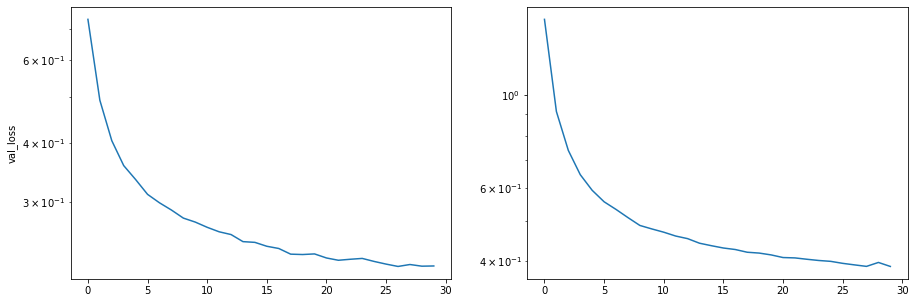

In [51]:
plot_model_loss(historico)

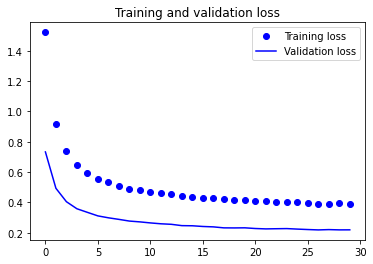

In [52]:
loss = historico.history['loss']
val_loss = historico.history['val_loss']
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [53]:
pred_dropout = rede_dropout.predict(x_teste)

accuracy_score(y_teste.argmax(1), pred_dropout.argmax(1))

0.9411

In [54]:
confusion_matrix(y_teste.argmax(1), pred_dropout.argmax(1))

array([[ 962,    0,    0,    2,    0,    4,    9,    1,    2,    0],
       [   0, 1109,    5,    3,    0,    1,    3,    0,   14,    0],
       [   7,    5,  967,   11,    6,    1,   12,    8,   14,    1],
       [   1,    0,   20,  936,    0,   35,    0,    7,    7,    4],
       [   1,    1,    3,    1,  929,    2,   13,    0,    5,   27],
       [  13,    0,    1,   30,    5,  804,   12,    1,   18,    8],
       [  18,    3,    4,    0,    4,    7,  920,    0,    2,    0],
       [   2,    6,   18,    3,    6,    0,    0,  966,    1,   26],
       [   9,    6,    8,    7,    7,   18,   12,    6,  892,    9],
       [   7,    4,    1,    5,   26,   20,    1,   12,    7,  926]],
      dtype=int64)

Nesse exemplo, pode ser observado que o dropout não melhorou a acurácia da predição no conjunto de teste. Em redes neurais, algumas arquiteturas vão funcionar muito bem para alguns casos e para outros nem tanto, enquanto que outra arquitetura pode ter um comportamento "complementar". Por motivos deste tipo se faz importante uma exploração abrangente e metodológica em diferentes arquiteturas para que a melhor seja de fato escolhida. Em outras palavras, não existe regra fechada do que é funciona melhor em cada caso.

Outro ponto interessante a ser notado é o comportamento da função de perda no conjunto de treino e no conjunto de validação. O dropout "desliga" alguns neurônios no backpropagation, sendo novamente "ligados" após essa etapa. Ou seja, no momento de calcular o valor da função de perda no conjunto de validação, todos os neurônios estarão ativos. Isso pode explicar o por quê do ``val_loss`` pode iniciar melhor que o ``loss``.